In [65]:
import pandas_datareader as data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
start = '2015-01-01'
end = '2023-12-31'

df = data.DataReader('TSLA', 'stooq', start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-08,196.100,203.0000,194.31,201.29,180673644
2023-02-07,196.430,197.5000,189.55,196.81,186010325
2023-02-06,193.010,198.1700,189.92,194.76,186188131
2023-02-03,183.950,199.0000,183.69,189.98,232662023
2023-02-02,187.325,196.7501,182.61,188.27,217448287


In [67]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-08,14.1873,14.2533,14.0007,14.0413,51634560
2015-01-07,14.2233,14.3187,13.9853,14.0633,44514750
2015-01-06,14.0040,14.2800,13.6140,14.0853,93924045
2015-01-05,14.3000,14.4333,13.8107,14.0060,80488110
2015-01-02,14.8580,14.8833,14.2173,14.6207,71461545


In [68]:
df = df.reset_index()

In [69]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-02-08,196.100,203.0000,194.31,201.29,180673644
1,2023-02-07,196.430,197.5000,189.55,196.81,186010325
2,2023-02-06,193.010,198.1700,189.92,194.76,186188131
3,2023-02-03,183.950,199.0000,183.69,189.98,232662023
4,2023-02-02,187.325,196.7501,182.61,188.27,217448287


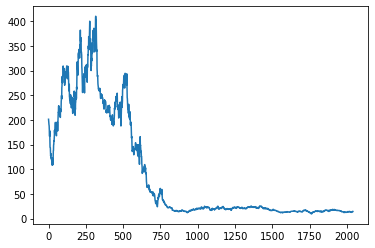

In [70]:
plt.plot(df.Close)

In [71]:
df

,Date,Open,High,Low,Close,Volume
0,2023-02-08,196.1000,203.0000,194.3100,201.2900,180673644
1,2023-02-07,196.4300,197.5000,189.5500,196.8100,186010325
2,2023-02-06,193.0100,198.1700,189.9200,194.7600,186188131
3,2023-02-03,183.9500,199.0000,183.6900,189.9800,232662023
4,2023-02-02,187.3250,196.7501,182.6100,188.2700,217448287
...,...,...,...,...,...,...
2035,2015-01-08,14.1873,14.2533,14.0007,14.0413,51634560
2036,2015-01-07,14.2233,14.3187,13.9853,14.0633,44514750
2037,2015-01-06,14.0040,14.2800,13.6140,14.0853,93924045
2038,2015-01-05,14.3000,14.4333,13.8107,14.0060,80488110


In [72]:
ma100 = df.Close.rolling(100).mean()

In [73]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2035    14.189131
2036    14.164197
2037    14.138750
2038    14.111610
2039    14.090184
Name: Close, Length: 2040, dtype: float64

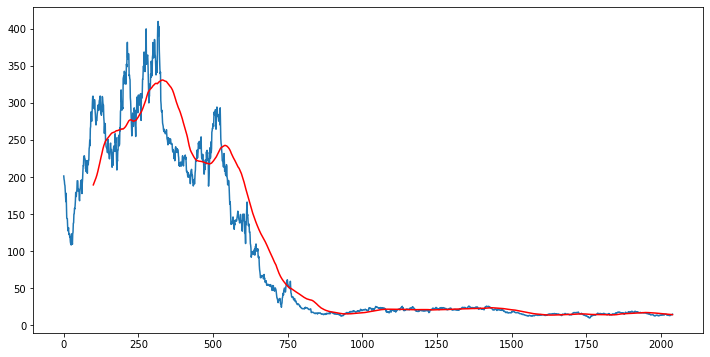

In [74]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [75]:
df.shape

(2040, 6)

In [76]:
# Spliting data into training & testing

In [77]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):  int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1428, 1)
(612, 1)


In [78]:
data_training.head()

,Close
0,201.29
1,196.81
2,194.76
3,189.98
4,188.27


In [79]:
data_testing.head()

,Close
1428,23.9767
1429,23.5200
1430,23.1547
1431,22.6567
1432,22.6913


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [81]:
data_training_array  = scaler.fit_transform(data_training)
data_training_array

array([[0.47572937],
       [0.46447418],
       [0.45932393],
       ...,
       [0.03015461],
       [0.02987147],
       [0.03199538]])

In [82]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [83]:
# ML Model

In [84]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [86]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [87]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [89]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
42/42 [==============================] - 11s 131ms/step - loss: 0.0404
Epoch 2/50
42/42 [==============================] - 6s 131ms/step - loss: 0.0098
Epoch 3/50
42/42 [==============================] - 6s 134ms/step - loss: 0.0074
Epoch 4/50
42/42 [==============================] - 6s 145ms/step - loss: 0.0077
Epoch 5/50
42/42 [==============================] - 8s 180ms/step - loss: 0.0069
Epoch 6/50
42/42 [==============================] - 7s 177ms/step - loss: 0.0063
Epoch 7/50
42/42 [==============================] - 7s 178ms/step - loss: 0.0064
Epoch 8/50
42/42 [==============================] - 7s 176ms/step - loss: 0.0064
Epoch 9/50
42/42 [==============================] - 7s 177ms/step - loss: 0.0063
Epoch 10/50
42/42 [==============================] - 8s 180ms/step - loss: 0.0059
Epoch 11/50
42/42 [==============================] - 8s 179ms/step - loss: 0.0053
Epoch 12/50
42/42 [==============================] - 8s 182ms/step - loss: 0.0050
Epoch 13/50
42/42 [=====

In [90]:
model.save('keras_model.h5')

In [91]:
  data_testing.head()

,Close
1428,23.9767
1429,23.5200
1430,23.1547
1431,22.6567
1432,22.6913


In [92]:
data_training.tail(100)

,Close
1328,21.3913
1329,21.7447
1330,21.7227
1331,22.4893
1332,22.4680
...,...
1423,25.3773
1424,25.0633
1425,23.9340
1426,23.8213


In [93]:
past_100_days = data_training.tail(100)

In [94]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\hetsu\AppData\Local\Temp\ipykernel_7576\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [95]:
final_df.head()

,Close
0,21.3913
1,21.7447
2,21.7227
3,22.4893
4,22.4680


In [96]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.73426069],
       [0.75622642],
       [0.754859  ],
       [0.80250735],
       [0.80118344],
       [0.83466657],
       [0.86246869],
       [0.89495733],
       [0.87879692],
       [0.85745275],
       [0.87805105],
       [0.87850479],
       [0.8740296 ],
       [0.87813186],
       [0.82571619],
       [0.88329076],
       [0.87626719],
       [0.87572644],
       [0.84725926],
       [0.81987358],
       [0.81776029],
       [0.81187417],
       [0.81754896],
       [0.83528812],
       [0.83420662],
       [0.85948523],
       [0.9232567 ],
       [0.95404228],
       [0.95897742],
       [1.        ],
       [0.97849422],
       [0.96950033],
       [0.9222187 ],
       [0.90779864],
       [0.91169579],
       [0.82761814],
       [0.85749626],
       [0.83230466],
       [0.85326969],
       [0.87734248],
       [0.87941847],
       [0.86814348],
       [0.84402717],
       [0.83698496],
       [0.84688632],
       [0.8671117 ],
       [0.86644664],
       [0.819

In [97]:
input_data.shape

(712, 1)

In [98]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [99]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(612, 100, 1)
(612,)


In [100]:
# Making Predictions

y_predicted = model.predict(x_test)

20/20 [==============================] - 1s 45ms/step


In [101]:
y_predicted.shape

(612, 1)

In [102]:
y_test

array([0.89495733, 0.86657095, 0.84386557, 0.81291217, 0.81506275,
       0.81771678, 0.79322754, 0.75195634, 0.71752224, 0.69013034,
       0.66377644, 0.69067109, 0.69266007, 0.70190258, 0.67264602,
       0.7182681 , 0.7135878 , 0.75058892, 0.7435032 , 0.75228577,
       0.73587673, 0.67757494, 0.68238577, 0.6289694 , 0.69344944,
       0.72605618, 0.74238441, 0.70608564, 0.68354186, 0.68992523,
       0.70492333, 0.68105565, 0.67098647, 0.65818245, 0.67065705,
       0.64882184, 0.65375077, 0.6643607 , 0.6346877 , 0.6838775 ,
       0.69912423, 0.65830676, 0.64239497, 0.62706744, 0.66303057,
       0.64164911, 0.55786359, 0.55629106, 0.55405347, 0.5543456 ,
       0.52438668, 0.49513012, 0.46040389, 0.46136108, 0.44341681,
       0.48998987, 0.48824952, 0.49053062, 0.46434454, 0.47374866,
       0.42472667, 0.41445238, 0.41946832, 0.42746151, 0.43475856,
       0.44561089, 0.44710262, 0.44259014, 0.44068197, 0.44055766,
       0.42497529, 0.46960289, 0.46541983, 0.53801737, 0.55409

In [103]:
y_predicted

array([[0.87273127],
       [0.86863726],
       [0.8617197 ],
       [0.8509631 ],
       [0.8357744 ],
       [0.81827396],
       [0.8014266 ],
       [0.78664464],
       [0.7728721 ],
       [0.7581508 ],
       [0.74111366],
       [0.7212622 ],
       [0.70107657],
       [0.6835747 ],
       [0.67175466],
       [0.665673  ],
       [0.6667468 ],
       [0.67439973],
       [0.6885865 ],
       [0.70684046],
       [0.72605675],
       [0.74189216],
       [0.7480064 ],
       [0.7432263 ],
       [0.7279229 ],
       [0.70766217],
       [0.6891496 ],
       [0.6782885 ],
       [0.6763331 ],
       [0.68045145],
       [0.68728775],
       [0.6947708 ],
       [0.69999844],
       [0.7009596 ],
       [0.6967787 ],
       [0.68905467],
       [0.67885524],
       [0.6678991 ],
       [0.6584064 ],
       [0.65052235],
       [0.646726  ],
       [0.649118  ],
       [0.65547293],
       [0.66188705],
       [0.66466135],
       [0.66430575],
       [0.6610891 ],
       [0.651

In [104]:
scaler.scale_

array([0.06215543])

In [105]:
scale_factor  = 1/0.06215543
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

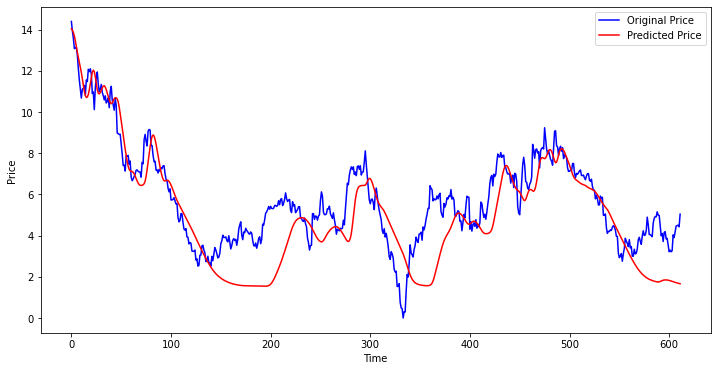

In [106]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()